In [1]:
import pandas as pd
from statsmodels.formula.api import ols

In [52]:
imdb = pd.read_csv("imdb_top_1000.csv")
imdb = imdb[imdb['Gross'].notna()]
imdb = imdb.reset_index(drop=True)
imdb["Gross"] = imdb["Gross"].apply(lambda x:  int(str(x).replace(",","")))
imdb = imdb[["Gross","IMDB_Rating"]]

In [110]:
model = ols("Gross ~ IMDB_Rating", data=imdb)
response = model.fit()
response.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.008     
Dependent Variable:        Gross                   AIC:                       33123.3897
Date:                      2022-11-30 16:54        BIC:                       33132.8349
No. Observations:          831                     Log-Likelihood:            -16560.   
Df Model:                  1                       F-statistic:               7.699     
Df Residuals:              829                     Prob (F-statistic):        0.00565   
R-squared:                 0.009                   Scale:                     1.1949e+16
----------------------------------------------------------------------------------------
                 Coef.         Std.Err.       t    P>|t|       [0.025         0.975]    
----------------------------------------------------------------------------------------
Intercept   -227376280.1977 106535840.1889 -2.1343 0.0331 -436487991.6326 -18264568.7627
IMDB_Rating   37172968.5217  13397414.7700  2.7746 0.0057   10876124.8830  63469812.1604
----------------------------------------------------------------------------------------
Omnibus:                    581.678              Durbin-Watson:                 1.768   
Prob(Omnibus):              0.000                Jarque-Bera (JB):              7833.746
Skew:                       3.083                Prob(JB):                      0.000   
Kurtosis:                   16.719               Condition No.:                 227     
========================================================================================

"""

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression as lr

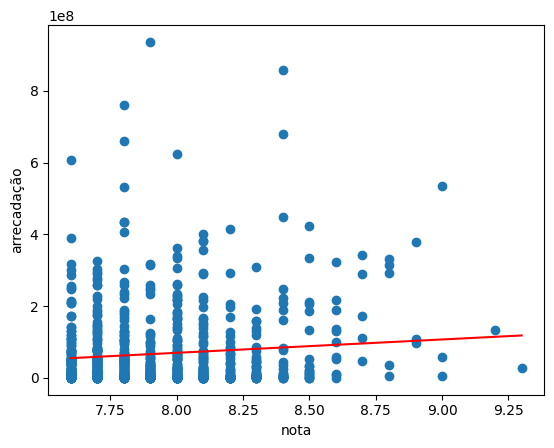

In [115]:
X = imdb['IMDB_Rating'].values.reshape(-1, 1)
Y = imdb['Gross'].values.reshape(-1, 1)
linear_regressor = lr()
reg = linear_regressor.fit(X, Y)
Y_p = linear_regressor.predict(X)
plot.scatter(X, Y)
plot.plot(X, Y_p, color='red')
plt.xlabel('nota')
plt.ylabel('arrecadação')
plot.savefig("correlacao.png")
plot.show()